# ECAL Minbias Training Sample

The goal of this notebook is to present the data structure in the default root file that contains the information that might be useful in fast simulation studies for the elecectromagnetic calorimeter in LHCb. The root file is located in `data/FastSimulationTraining-ECAL-Minbias-Upgrade.root`. It contains 50 minbias events.

The root file has been generated with the `options/FastSimulationTraining-ECAL-Minbias-Upgrade.py` file. You can run it by yourself as follows:

```
lb-run Gauss/v55r2 gaudirun.py options/FastSimulationTraining-ECAL-Minbias-Upgrade.py
```

This notebook is structured as follows:

1. The root file is loaded and we present the contents of it.
2. We convert the root file to pandas dataframe.
3. Some basic statistics of the properties are presented using matplotlib.
4. Some additional checks are made in order to make sure that for each hit generated in ECAL we have the corresponding hit in the EcalCollector plane.
5. We present a gallery of events with some visualization.

In [1]:
### Libraries used in the notebook

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

#scikit-hep
from particle import Particle
from collections import Counter

# root
import ROOT
ROOT.ROOT.EnableImplicitMT()

# local vis
from vis.ecal_image import EcalImage
from vis.lhcb_image import LHCbImage

Welcome to JupyROOT 6.24/02


## Loading the root file and converting to pandas

The root file contains 2 TTrees:

1. The first one contains the **hits** (MCCaloHits) generated in **ECAL**.
2. The second one consists of the information generated by the so-called MCCollector plane. This plane has been placed in front of the calorimeter and it collects all the necessary information about the **particles** passing through it.

The linking between these two collections can be made with the help of the following keys:

1. `Event_ID` - an identifier of the event,
2. `Particle_Index` - a unique (per event) index of the particle.

In [3]:
# load the root file
root_file = ROOT.TFile("data/FastSimulationTraining-ECAL-Minbias-Upgrade.root", "OPEN")


## Getting ECAL MCCaloHits Tree

Get the ECAL hits TTree from the root file and convert it to the dataframe.

In [4]:
hits_tree = root_file.Get("EcalCollector/Hits")
hits_tree.Print()

******************************************************************************
*Tree    :Hits      : Hits                                                   *
*Entries :   111288 : Total =         6700382 bytes  File  Size =    1610202 *
*        :          : Tree compression factor =   4.16                       *
******************************************************************************
*Br    0 :Event_ID  : Event_ID/L                                             *
*Entries :   111288 : Total  Size=     893289 bytes  File Size  =       8447 *
*Baskets :       28 : Basket Size=      32000 bytes  Compression= 105.65     *
*............................................................................*
*Br    1 :Particle_Index : Particle_Index/L                                  *
*Entries :   111288 : Total  Size=     893481 bytes  File Size  =     124018 *
*Baskets :       28 : Basket Size=      32000 bytes  Compression=   7.20     *
*...................................................

In [5]:
# convert root to pandas 
hits_data, hits_columns = hits_tree.AsMatrix(return_labels=True)
hits_dfs = pd.DataFrame(data=hits_data, columns=hits_columns)

/mmazurekgda/miniconda3/envs/py3root2/lib/python3.9/site-packages/ROOT/pythonization/_ttree.py:191: FutureWarning: TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.
  warnings.warn("TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.", FutureWarning)


In [6]:
hits_dfs.describe()

Event_ID  Particle_Index  Active_Energy        Cell_ID  \
count  111288.000000   111288.000000   1.112880e+05  111288.000000   
mean       23.696454     1579.098321   1.521298e+01    7863.237213   
std        13.618070     1213.240035   6.875908e+01    3201.968233   
min         3.000000       40.000000   1.078376e-10     386.000000   
25%        11.000000      617.000000   5.875012e-01    5770.000000   
50%        21.000000     1167.000000   1.942978e+00    9630.000000   
75%        36.000000     2307.000000   8.700690e+00   10390.000000   
max        48.000000     6143.000000   4.297978e+03   11383.000000   

              Cell_X         Cell_Y         Cell_Z      Cell_Size  
count  111288.000000  111288.000000  111288.000000  111288.000000  
mean      -10.888662      18.512187   12654.948710      59.441877  
std      1183.849633     785.904091       4.660785      29.501369  
min     -3839.850000   -3108.619846   12639.306496      40.633333  
25%      -629.816667    -345.598101   12651.487662      40.633333  
50%       -60.950000      20.099528   12656.756229      40.633333  
75%       629.816667     385.797156   12658.512072      60.950000  
max      3839.850000    3108.239846   12661.693504     121.900000

## Getting ECAL Collector Particles

Get the collector particles TTree from the root file and convert it to the dataframe.

In [7]:
particles_tree = root_file.Get("EcalCollector/Particles")
particles_tree.Print()

******************************************************************************
*Tree    :Particles : Particles                                              *
*Entries :    23936 : Total =         1829848 bytes  File  Size =    1333742 *
*        :          : Tree compression factor =   1.37                       *
******************************************************************************
*Br    0 :Event_ID  : Event_ID/L                                             *
*Entries :    23936 : Total  Size=     192553 bytes  File Size  =       2249 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression=  85.39     *
*............................................................................*
*Br    1 :Entry_X   : Entry_X/D                                              *
*Entries :    23936 : Total  Size=     192463 bytes  File Size  =     184296 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.04     *
*...................................................

In [8]:
# convert root to pandas 
particles_data, particles_columns = particles_tree.AsMatrix(return_labels=True)
particles_dfs = pd.DataFrame(data=particles_data, columns=particles_columns)

/mmazurekgda/miniconda3/envs/py3root2/lib/python3.9/site-packages/ROOT/pythonization/_ttree.py:191: FutureWarning: TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.
  warnings.warn("TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.", FutureWarning)


In [9]:
particles_dfs.describe()

Event_ID       Entry_X       Entry_Y       Entry_Z      Momentum  \
count  23936.000000  23936.000000  23936.000000  23936.000000  2.393600e+04   
mean      24.106785    -51.488548     47.533054  11948.161730  1.811475e+04   
std       13.626835   1875.620852   1225.891624      4.428959  1.680827e+05   
min        1.000000  -4996.956154  -4971.404853  11930.029074  1.000693e+00   
25%       11.000000   -664.600199   -261.563895  11947.045010  5.208990e+00   
50%       22.000000    -20.147906      7.332560  11948.016491  5.341368e+01   
75%       36.000000    616.403011    306.088717  11949.095852  7.966391e+02   
max       50.000000   4998.595716   4995.969897  11966.039676  3.500001e+06   

         Momentum_X    Momentum_Y    Momentum_Z  Particle_Index  Particle_PID  
count  23936.000000  23936.000000  2.393600e+04    23936.000000  2.393600e+04  
mean     -17.766179      3.413177  1.809288e+04     1609.783966  6.268081e+05  
std      421.151056    177.302119  1.680844e+05     1170.670005  2.502634e+07  
min    -3763.777211  -3419.070384  2.978973e-02        1.000000 -3.122000e+03  
25%       -5.607884     -2.163506  4.699025e+00      648.000000  2.200000e+01  
50%       -0.036347      0.014879  4.927826e+01     1313.500000  2.200000e+01  
75%        3.900377      2.775575  7.465922e+02     2338.000000  2.200000e+01  
max     4536.780844   3208.591547  3.499999e+06     6143.000000  1.000020e+09

## General stats based on all the 50 events

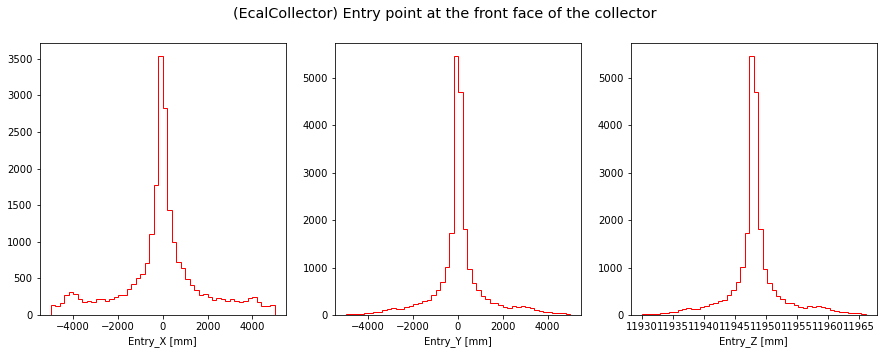

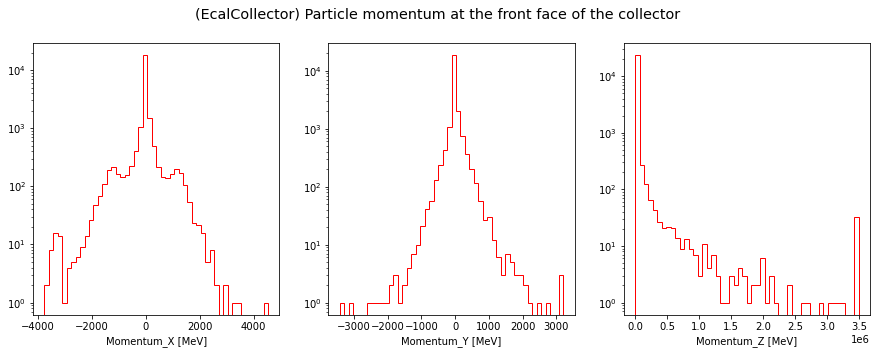

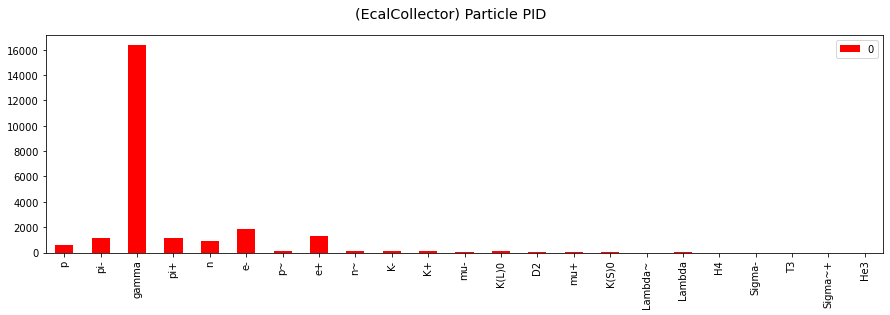

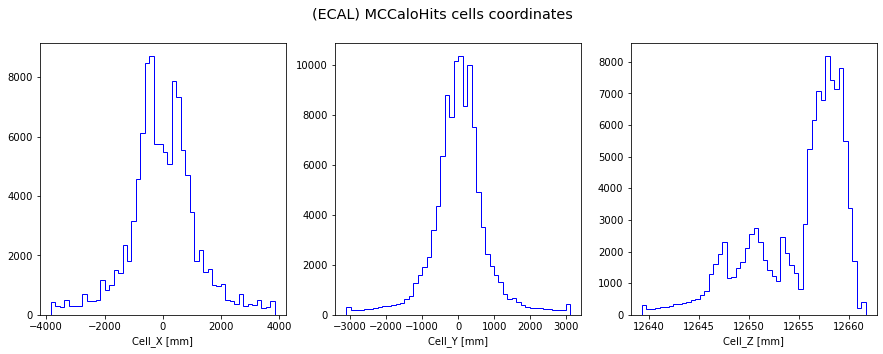

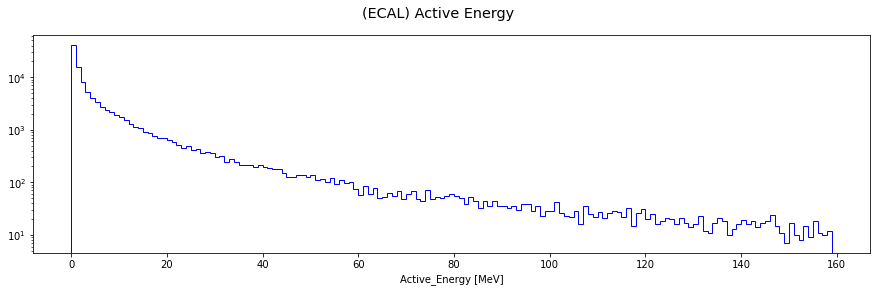

In [10]:
bins = 50

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('(EcalCollector) Entry point at the front face of the collector', size='x-large')
ax1.hist(particles_dfs['Entry_X'], histtype='step', bins=bins, color='red')
ax1.set_xlabel('Entry_X [mm]')
ax2.hist(particles_dfs['Entry_Y'], histtype='step', bins=bins, color='red')
ax2.set_xlabel('Entry_Y [mm]')
ax3.hist(particles_dfs['Entry_Z'], histtype='step', bins=bins, color='red')
ax3.set_xlabel('Entry_Z [mm]')
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('(EcalCollector) Particle momentum at the front face of the collector', size='x-large')
ax1.hist(particles_dfs['Momentum_X'], histtype='step', bins=bins, color='red', log=True)
ax1.set_xlabel('Momentum_X [MeV]')
ax2.hist(particles_dfs['Momentum_Y'], histtype='step', bins=bins, color='red', log=True)
ax2.set_xlabel('Momentum_Y [MeV]')
ax3.hist(particles_dfs['Momentum_Z'], histtype='step', bins=bins, color='red', log=True)
ax3.set_xlabel('Momentum_Z [MeV]')
plt.show()


particles_dfs['Particle_Name'] = particles_dfs['Particle_PID'].apply(lambda x: Particle.from_pdgid(x))
pdf = pd.DataFrame.from_dict(Counter(particles_dfs['Particle_Name']), orient='index')
pdf.plot(kind='bar', color='red',figsize=(15, 4))
plt.suptitle('(EcalCollector) Particle PID', size='x-large')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('(ECAL) MCCaloHits cells coordinates ', size='x-large')
ax1.hist(hits_dfs['Cell_X'], histtype='step', bins=bins, color='blue')
ax1.set_xlabel('Cell_X [mm]')
ax2.hist(hits_dfs['Cell_Y'], histtype='step', bins=bins, color='blue')
ax2.set_xlabel('Cell_Y [mm]')
ax3.hist(hits_dfs['Cell_Z'], histtype='step', bins=bins, color='blue')
ax3.set_xlabel('Cell_Z [mm]')
plt.show()

fig, ax = plt.subplots(figsize=(15, 4))
plt.suptitle('(ECAL) Active Energy', size='x-large')
ax.hist(hits_dfs['Active_Energy'], histtype='step', bins=np.arange(0,160,1), color='blue', log=True)
ax.set_xlabel('Active_Energy [MeV]')
plt.show()

### Test for empty relations

In [11]:
# here we merge the 2 collections using the event_id and particle_index ids
merged_dfs = particles_dfs.merge(hits_dfs, left_on=['Event_ID', 'Particle_Index'], right_on=['Event_ID', 'Particle_Index'])

In [12]:
merged_dfs.describe()

Event_ID        Entry_X        Entry_Y        Entry_Z  \
count  111288.000000  111288.000000  111288.000000  111288.000000   
mean       23.696454      -5.853645      19.268089   11948.059613   
std        13.618070    1004.088448     642.206969       2.320196   
min         3.000000   -4147.290340   -3599.214597   11934.986587   
25%        11.000000    -485.290708    -216.890326   11947.206408   
50%        21.000000     -32.539656      15.572138   11948.046260   
75%        36.000000     474.951833     259.453597   11948.927366   
max        48.000000    4087.996178    3302.831541   11959.922626   

            Momentum     Momentum_X     Momentum_Y     Momentum_Z  \
count  111288.000000  111288.000000  111288.000000  111288.000000   
mean    12772.457839      -4.646440      17.593644   12720.294167   
std     17933.794764     952.180052     471.557361   17939.382872   
min         1.003766   -3399.445516   -3419.070384       0.358954   
25%      1490.791375    -517.185733    -142.361645    1443.470424   
50%      5865.625907      -2.156711       2.089556    5751.347000   
75%     16048.930633     516.402071     165.353636   16015.946376   
max    158411.430545    4536.780844    3208.591547  158385.983584   

       Particle_Index  Particle_PID  Active_Energy        Cell_ID  \
count   111288.000000  1.112880e+05   1.112880e+05  111288.000000   
mean      1579.098321  5.396382e+04   1.521298e+01    7863.237213   
std       1213.240035  7.342535e+06   6.875908e+01    3201.968233   
min         40.000000 -2.212000e+03   1.078376e-10     386.000000   
25%        617.000000 -2.110000e+02   5.875012e-01    5770.000000   
50%       1167.000000  2.200000e+01   1.942978e+00    9630.000000   
75%       2307.000000  2.110000e+02   8.700690e+00   10390.000000   
max       6143.000000  1.000010e+09   4.297978e+03   11383.000000   

              Cell_X         Cell_Y         Cell_Z      Cell_Size  
count  111288.000000  111288.000000  111288.000000  111288.000000  
mean      -10.888662      18.512187   12654.948710      59.441877  
std      1183.849633     785.904091       4.660785      29.501369  
min     -3839.850000   -3108.619846   12639.306496      40.633333  
25%      -629.816667    -345.598101   12651.487662      40.633333  
50%       -60.950000      20.099528   12656.756229      40.633333  
75%       629.816667     385.797156   12658.512072      60.950000  
max      3839.850000    3108.239846   12661.693504     121.900000

The table below should be empty. If it is not it means that some IDs were not found correctly.

In [13]:

merged_dfs[merged_dfs.isna().any(axis=1)]

Empty DataFrame
Columns: [Event_ID, Entry_X, Entry_Y, Entry_Z, Momentum, Momentum_X, Momentum_Y, Momentum_Z, Particle_Index, Particle_PID, Particle_Name, Active_Energy, Cell_ID, Cell_X, Cell_Y, Cell_Z, Cell_Size]
Index: []

## Event Example 1

In [14]:
event_id = 4
particles_df = particles_dfs[particles_dfs["Event_ID"] == event_id]
hits_df = hits_dfs[hits_dfs["Event_ID"] == event_id]
merged_df = merged_dfs[merged_dfs["Event_ID"] == event_id]

In [15]:
# some custom formatting, not relevant
import matplotlib.ticker as ticker

class OOMFormatter(ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
             self.format = r'$\mathdefault{%s}$' % self.format

### MCCaloHits deposits linked with particle entries in the collector

/mmazurekgda/test_appconfig_collector/gausstrainingsample/vis/ecal_image.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  return ax.pcolormesh(self.X, self.Y, self.E, cmap=cmap, rasterized=rasterized)


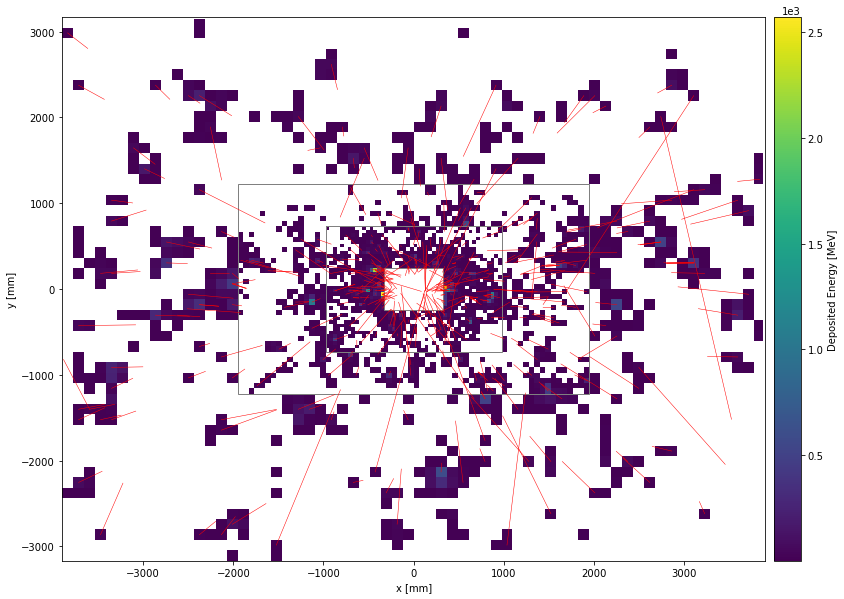

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
ecim = EcalImage(hits_df)
im = ecim.plot_grid(ax, rasterized=True, nan_color="")


cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.01, format=OOMFormatter(3, mathText=False))
cbar.set_label('Deposited Energy [MeV]')
#ax.set_title("MCCaloHits deposits in ECAL with Collector<->MCCaloHit links")
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ecim.plot_links(ax, merged_df, color='red', linewidth=.5)
props = dict(boxstyle='round', fc='w', ec='w', alpha=0.8)

plt.show()

### Check if there are any unlinked hits (should be empty)

<AxesSubplot:xlabel='Cell_X', ylabel='Cell_Y'>

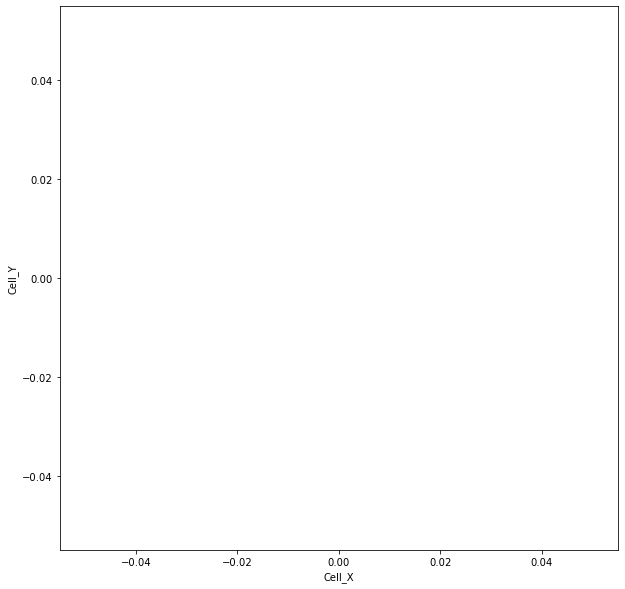

In [17]:
not_linked_hits = hits_df[~hits_df['Particle_Index'].isin(particles_df['Particle_Index'])]
not_linked_hits.plot.scatter(x='Cell_X', y='Cell_Y', figsize=(10,10))

### Check if there are any unlinked particles (does not have to be empty)

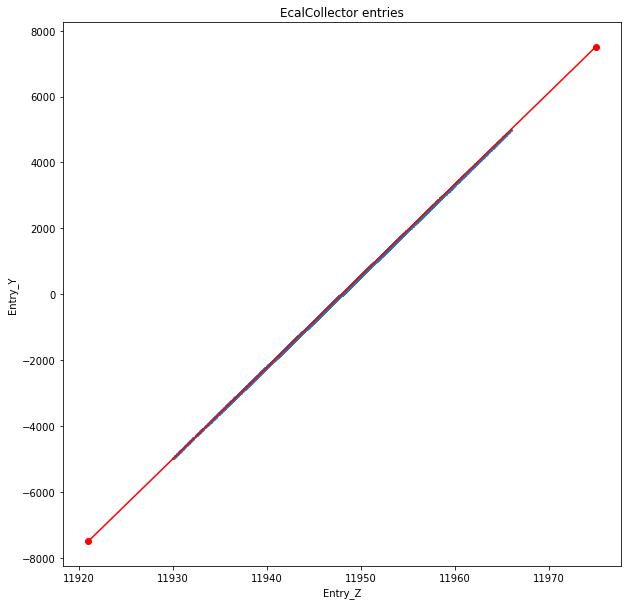

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
x_out_rot, y_out_rot = LHCbImage.rotate_lhcb_plane(z_point=11948., y_points=[-7500, 7500])
plt.plot(x_out_rot, y_out_rot, marker = 'o', color='red',  label="MCCollector z = 11948 mm")
particles_dfs.plot.scatter(x='Entry_Z', y='Entry_Y', s=2, title='EcalCollector entries', ax=ax)
plt.show()

### Particle entries

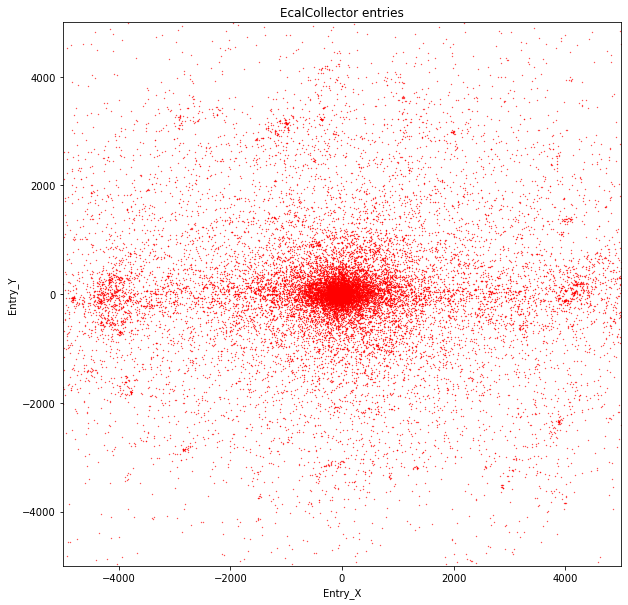

In [19]:
particles_dfs.plot.scatter(x='Entry_X', y='Entry_Y', s=.1, color='r', title="EcalCollector entries", figsize=(10, 10))
plt.xlim(-5e3, 5e3)
plt.ylim(-5e3, 5e3)
plt.savefig('ecalcollector_entries_xy.png', bbox_inches='tight', dpi=200)

# LHCb material scan

/mmazurekgda/test_appconfig_collector/gausstrainingsample/vis/lhcb_image.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  return ax.pcolormesh(self.X, self.Y, self.E, **kwargs)


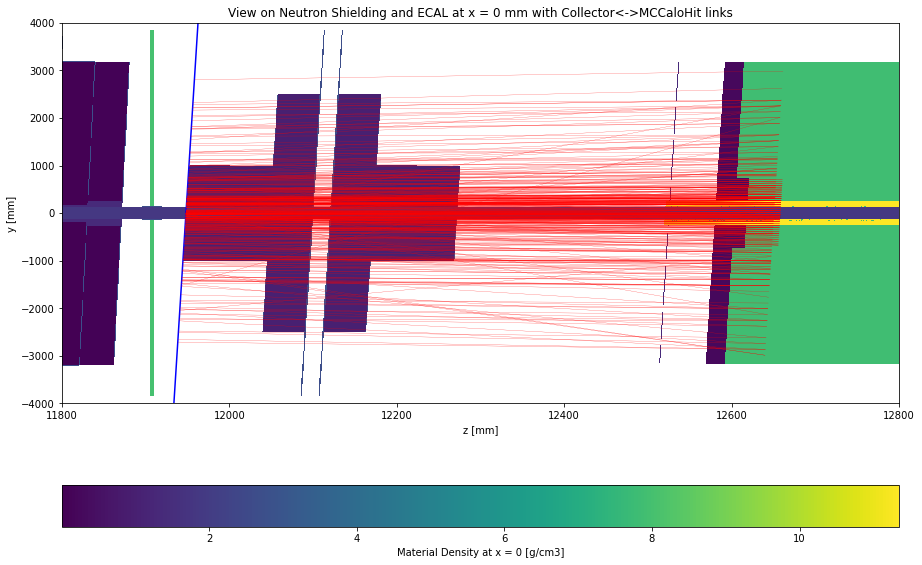

In [20]:
from vis.ecal import EcalStart

fig, ax = plt.subplots(figsize=(15, 10))
lbim = LHCbImage(2000, -4e3, 4e3, 1.18e4, 1.28e4)
im = lbim.plot_grid(ax, 'vis/lhcb_material_scan.pkl')
cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label('Material Density at x = 0 [g/cm3]')

ax.set_xlim(1.18e4, 1.28e4)
ax.set_ylim(-4e3, 4e3)

ax.set_title("View on Neutron Shielding and ECAL at x = 0 mm with Collector<->MCCaloHit links")
ax.set_xlabel('z [mm]')
ax.set_ylabel('y [mm]')
x_out_rot, y_out_rot = LHCbImage.rotate_lhcb_plane(z_point=11948, y_points=[-7500, 7500])
ax.plot(x_out_rot, y_out_rot, marker = 'o', color='blue',  label="MCCollector z = 11948 mm")

lbim.plot_links(ax, merged_df, color='red', linewidth=.2)
plt.show()